In [1]:
# parse yaml file
import yaml
fname = "input_params.yml"
with open(fname, 'r') as f:
    params = yaml.load(f, Loader=yaml.FullLoader)
print(params)

n_r = params['domain']['n_rtp'][0]
n_t = params['domain']['n_rtp'][1]
n_p = params['domain']['n_rtp'][2]

earth_r = 6371.0
minr = earth_r - params['domain']['min_max_dep'][1]
maxr = earth_r - params['domain']['min_max_dep'][0]

mint = params['domain']['min_max_lat'][0]
maxt = params['domain']['min_max_lat'][1]

minp = params['domain']['min_max_lon'][0]
maxp = params['domain']['min_max_lon'][1]

import numpy as np

arr_r = np.linspace(minr, maxr, n_r)
arr_t = np.linspace(mint, maxt, n_t)
arr_p = np.linspace(minp, maxp, n_p)


{'version': 2, 'domain': {'min_max_dep': [-10.0, 10.0], 'min_max_lat': [37.7, 42.3], 'min_max_lon': [22.7, 27.3], 'n_rtp': [10, 50, 50]}, 'source': {'src_rec_file': 'OUTPUT_FILES/src_rec_file_forward.dat', 'swap_src_rec': 1}, 'model': {'init_model_path': './test_model_init.dat'}, 'inversion': {'run_mode': 1, 'optim_method': 0, 'max_iterations_inv': 100, 'step_size': 0.01, 'n_inversion_grid': 5, 'n_inv_dep_lat_lon': [5, 10, 10], 'min_max_dep_inv': [-10.0, 10.0], 'min_max_lat_inv': [37.7, 42.3], 'min_max_lon_inv': [22.7, 27.3], 'max_sub_iterations': 100}, 'parallel': {'n_sims': 1, 'ndiv_rtp': [1, 2, 2], 'nproc_sub': 2}, 'calculation': {'convergence_tolerance': '1e-6', 'max_iterations': 200, 'stencil_order': 3, 'sweep_type': 1, 'output_file_format': 1}, 'output_setting': {'is_output_source_field': 1, 'is_verbose_output': 1, 'is_output_model_dat': 0}}


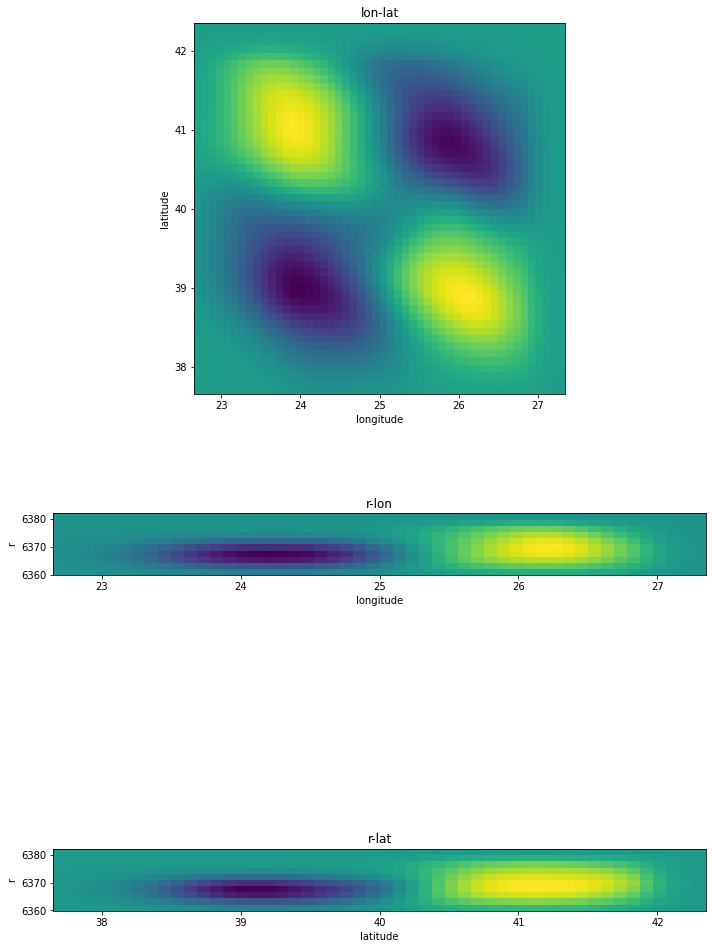

In [5]:
import numpy as np

#
# plot calculated final model

# grid size
fpath = "OUTPUT_FILES/final_model.dat"
#fpath = "test_mode_true.dat"

data_glob = np.loadtxt(fpath, delimiter="   ", dtype=np.float64)
data_vel = data_glob[:,0].reshape(n_r, n_t, n_p)
#data_eta = data_glob[:,0].reshape(n_r, n_t, n_p)
#data_xi = data_glob[:,1].reshape(n_r, n_t, n_p)
#data_zeta = data_glob[:,2].reshape(n_r, n_t, n_p)

#
# plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 1, figsize=(10, 15))

iz_slice=3
ax[0].pcolormesh(arr_p[:], arr_t[:], data_vel[iz_slice,:,:], shading='auto')
ax[0].set_title('lon-lat')
ax[0].set_xlabel('longitude')
ax[0].set_ylabel('latitude')
ax[0].set_aspect(1)

iy_slice=10
ax[1].pcolormesh(arr_p[:], arr_r[:], data_vel[:,iy_slice,:], shading='auto')
ax[1].set_title('r-lon')
ax[1].set_xlabel('longitude')
ax[1].set_ylabel('r')
ax[1].set_aspect(0.02)

ix_slice=10
ax[2].pcolormesh(arr_t[:], arr_r[:], data_vel[:,:,ix_slice], shading='auto')
ax[2].set_title('r-lat')
ax[2].set_xlabel('latitude')
ax[2].set_ylabel('r')
ax[2].set_aspect(0.02)

plt.tight_layout()




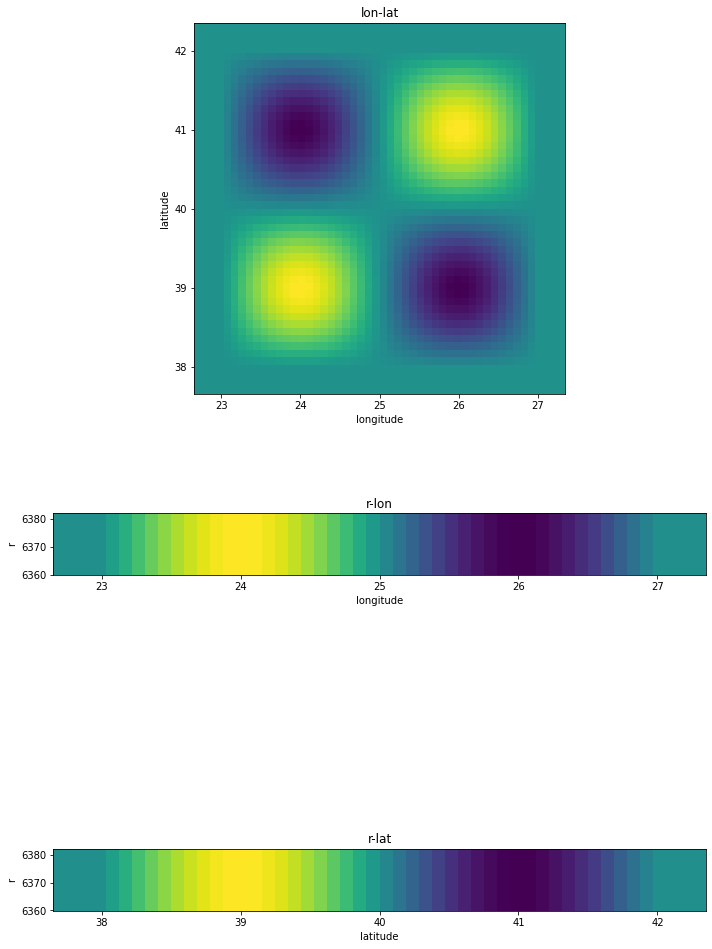

In [4]:
import numpy as np
#
# plot calculated final model

# grid size
nx = 50
ny = 50
nz = 10
npar = 4 #number of parameters

#fpath = "OUTPUT_FILES/final_model.dat"
fpath = "test_model_true.dat"

data_glob = np.loadtxt(fpath, delimiter="   ", dtype=np.float64)
data_vel = data_glob[:,3].reshape(nz, ny, nx)
#data_eta = data_glob[:,0].reshape(nz, ny, nx)
#data_xi = data_glob[:,1].reshape(nz, ny, nx)
#data_zeta = data_glob[:,2].reshape(nz, ny, nx)

#
# plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 1, figsize=(10, 15))

iz_slice=3
ax[0].pcolormesh(arr_p[:], arr_t[:], data_vel[iz_slice,:,:], shading='auto')
ax[0].set_title('lon-lat')
ax[0].set_xlabel('longitude')
ax[0].set_ylabel('latitude')
ax[0].set_aspect(1)

iy_slice=10
ax[1].pcolormesh(arr_p[:], arr_r[:], data_vel[:,iy_slice,:], shading='auto')
ax[1].set_title('r-lon')
ax[1].set_xlabel('longitude')
ax[1].set_ylabel('r')
ax[1].set_aspect(0.02)

ix_slice=10
ax[2].pcolormesh(arr_t[:], arr_r[:], data_vel[:,:,ix_slice], shading='auto')
ax[2].set_title('r-lat')
ax[2].set_xlabel('latitude')
ax[2].set_ylabel('r')
ax[2].set_aspect(0.02)

plt.tight_layout()

